In [1]:
import numpy as np
import matplotlib.pyplot as plt

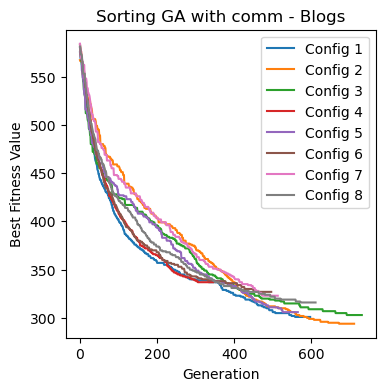

In [19]:
# Initialize a list to store the data
data_list = []
finals = []
lengths = []

dataset = "Blogs"
centrality = "comm"

configs = [0,1,6,7 , 8, 9,10,11]

# Loop through the file indices
for i in range(8):  # Adjust range if you have more files
    # Construct the filename

    if configs[i] > 7:
        filename = f'../Sorting/FINALRD/{centrality}/{dataset}/saved_fit_config{configs[i]-8}.npy'
    else:
        filename = f'../Sorting/FINALRD_with_uniform/{centrality}/{dataset}/saved_fit_config{configs[i]}.npy'
    
    # Load the data from the .npy file
    data = np.load(filename)
    
    # Append the data to the list
    data_list.append(data)

    finals.append(data[np.size(data)-1])
    lengths.append(np.size(data))

# Create a new figure
plt.figure(figsize = (4,4))

# Loop through the loaded data and plot each one
for i, data in enumerate(data_list):
    plt.plot(data, label=f'Config {i+1}')  # Adjust plotting based on the shape of your data

# Add a legend to differentiate between the files
plt.legend()

# Add labels and title
plt.xlabel('Generation')  # Adjust label according to your data
plt.ylabel('Best Fitness Value')  # Adjust label according to your data
plt.title(f'Sorting GA with {centrality} - {dataset}')
# - Best fitness value for final 8 configs
plt.savefig(f'../Sorting/{dataset} {centrality} final8.png', bbox_inches='tight')
# Show the plot
plt.show()

In [15]:
for i, data in enumerate(data_list):
    print(len(data))

390
294
341
575


In [16]:
for i, data in enumerate(data_list):
    print(data[len(data)-1])

106
95
96
84


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import combinations
from collections import defaultdict
import time
from numba import njit
import community as community

#@njit(parallel=True)
def opt_n_m_anonymity_adj(adj_matrix):
    n_m_anonymity_dict = defaultdict(list)
    
    num_nodes = adj_matrix.shape[0]

    for node in range(num_nodes):
        # Step 1: Determine ego state (neighbors and edges)
        neighbors = np.nonzero(adj_matrix[node])[0]
        num_neighbors = len(neighbors)
        
        # Use Numpy operations for efficiency
        neighborhood_edges = int(np.count_nonzero(adj_matrix[neighbors][:, neighbors])/2)

        ego_state = (num_neighbors + 1, neighborhood_edges+num_neighbors)

        # Step 2: Count unique equivalence classes
        n_m_anonymity_dict[ego_state].append(node)

    number_unique = sum(1 for equivalence_class in n_m_anonymity_dict.values() if len(equivalence_class) == 1)

    return n_m_anonymity_dict, number_unique

# Function to calculate n-m-anonymity
def calculate_n_m_anonymity(graph, deleted_edges, edges_to_delete):
    # Create a copy of the graph to avoid modifying the original graph
    modified_graph = graph.copy()

    # Delete edges based on the binary string
    for edge, delete_flag in zip(edges_to_delete, deleted_edges):
        if delete_flag:
            modified_graph.remove_edge(*edge)

    # Calculate n-m-anonymity
    modified_graph_adj = nx.to_numpy_array(modified_graph).astype(int)
    _, fitness = opt_n_m_anonymity_adj(modified_graph_adj)

    return fitness

#dataset = "CA-GrQc"

if dataset == "CA-GrQc":
    mediumG = nx.read_edgelist(r"./../../CA-GrQc.txt")
elif dataset == "CollegeMsg":
    mediumG = nx.read_edgelist(r"./../../CollegeMsg_noTime.txt")
elif dataset == "Blogs":
    mediumG = nx.read_edgelist(r"./../../moreno_blogs.txt")

mediumG.remove_edges_from(nx.selfloop_edges(mediumG))
edge_del = []

for i in range(4):  # Adjust range if you have more files
    # Construct the filename
    filename = f'../Sorting/FINALRD/{centrality}/{dataset}/population_config{i}.npy'
    
    # Load the data from the .npy file
    data = np.load(filename)

    unique_values = np.array([calculate_n_m_anonymity(mediumG, individual, mediumG.edges()) for individual in data])
    edges = np.array([sum(individual) for individual in data])
    
    min_value = np.min(unique_values)

    # Step 2: Find all indices where the unique_values are equal to the minimum value
    min_indices = np.where(unique_values == min_value)[0]
    
    # Step 3: Retrieve the corresponding edges
    min_edges = [edges[i] for i in min_indices]
    
    # Step 4: Find the minimum edge (assuming you want the lexicographically smallest edge)
    min_edge = min(min_edges)
    
    edge_del.append(min_edge)

print(edge_del)

[621, 278, 429, 485]


In [2]:
from PIL import Image

centrality = "comm"

# Load your images
image1 = Image.open(f'../CA-GrQc finalfinal.png')
image2 = Image.open(f'../CollegeMsg finalfinal.png')
image3 = Image.open(f'../Blogs finalfinal.png')

# Get the dimensions of each image
width1, height1 = image1.size
width2, height2 = image2.size
width3, height3 = image3.size

# Create a new image with a width equal to the sum of the three images' widths and the height equal to the maximum height
total_width = width1 + width2 + width3
max_height = max(height1, height2, height3)
new_image = Image.new('RGB', (total_width, max_height))

# Paste the first image at the beginning (0, 0)
new_image.paste(image1, (0, 0))

# Paste the second image to the right of the first one
new_image.paste(image2, (width1, 0))

# Paste the third image to the right of the second one
new_image.paste(image3, (width1 + width2, 0))

# Save the new image
new_image.save(f'../Comparative finalfinal.png')

# Show the new image
new_image.show()

In [ ]:
i = 0
filename = f'./FINALRD/CA-GrQc/population_config{i}.npy'

# Load the data from the .npy file
data = np.load(filename)

In [ ]:
sum(data[0])

In [ ]:
import itertools
import random
import numpy as np

popn_init_options = [0.005]
p_selection_options = [1,2]
n_points_options = [10,111]
m_rate_options = [1111]
e_selection_options = [3] 


#configs_setups = [50, 25, 13, 5, 2]
#number_runs = [10, 20, 40, 80, 1000]

all_combinations = list(itertools.product(popn_init_options, p_selection_options, n_points_options, m_rate_options, e_selection_options))
random.shuffle(all_combinations)

selected_configs = all_combinations

In [ ]:
selected_configs = [(0.005, 1, 10, 1111, 3), (0.005,1,111,1111,3), (0.005,2,10,1111,3), (0.005,2,111,1111,3)]